In [ ]:
# Homework # 4 Decision Tree

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop a Machine learning model that can help in Loan repayment Prediction using Decision Tree algorithm 

### Dataset - Loan Repayment dataset

The Loan Repayment dataset is made up of 1000 rows and six columns.
Each row represents information about a particular person that relates to loan repayment.
This dataset is perfect for classification algorithms such as the decision tree.

### Student - Huy Le

### Problem
### Data Exploration: Understanding the dataset and key features.
### Data Preprocessing: Cleaning the data, handling missing values, and normalizing features.
### Modeling: Implementing and evaluating machine learning model - Decision Tree
### Evaluation: Evaluate the performance of the model.

In [ ]:
# Step 1 - Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [ ]:
# Step 2 – Import data

In [5]:
file_path = "Loans_Dataset.csv"

df = pd.read_csv(file_path)

display(df.head())

print("Dataset info:")
df.info()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   house_number     1004 non-null   int64 
 4   sum              1004 non-null   int64 
 5   result           1004 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.2+ KB


In [ ]:
## Step 3 – Data Exploration

In [ ]:
## Describe

In [3]:
# Describe data
display(df.describe())

,initial_payment,last_payment,credit_score,house_number,sum
count,1004.000,1004.000,1004.000,1004.000,1004.000
mean,294.662,12473.010,528.902,4041.283,17744.013
std,115.844,1442.134,259.682,618.431,9594.660
min,100.000,10005.000,100.000,3003.000,13515.000
25%,195.750,11213.500,302.750,3546.500,16081.250
50%,290.000,12467.000,518.000,4046.000,17383.000
75%,398.000,13690.000,755.000,4508.750,18608.250
max,500.000,14999.000,997.000,9876.000,246789.000


In [8]:
# Check the target distribution
print("`result` value counts:")
print(df["result"].value_counts())

`result` value counts:
result
No     521
yes    483
Name: count, dtype: int64


In [ ]:
## Distribution

C:\Users\micro\AppData\Local\Temp\ipykernel_15916\2680174405.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\micro\AppData\Local\Temp\ipykernel_15916\2680174405.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\micro\AppData\Local\Temp\ipykernel_15916\26

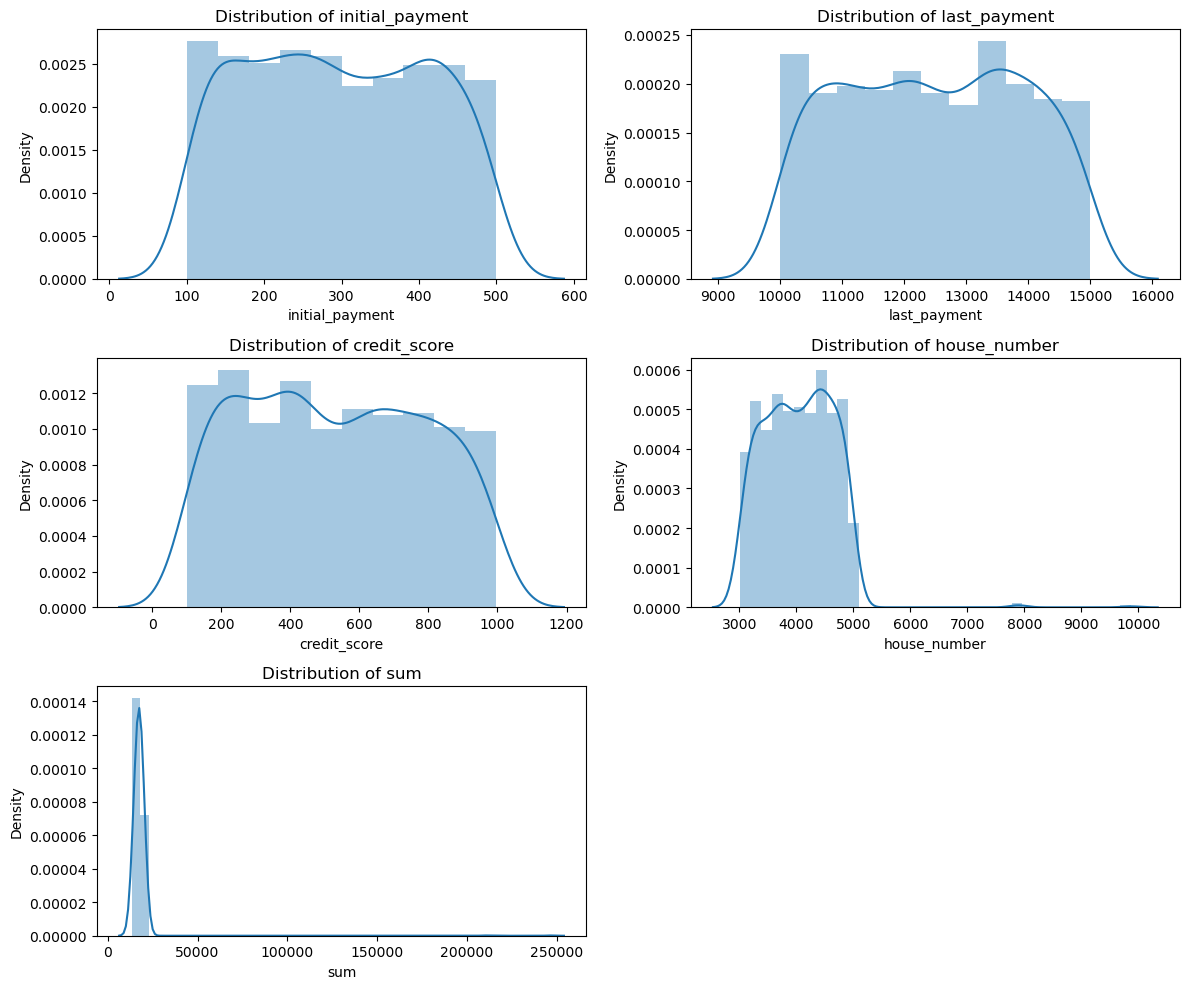

In [9]:
# I plot each distribution to see each feature and how they are distributed.
numeric_columns = ["initial_payment", "last_payment", "credit_score", 
                   "house_number", "sum"]

plt.figure(figsize=(12, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [ ]:
## Step 4 – Data Cleaning

In [10]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64


In [ ]:
## Label encoding

In [11]:
le = LabelEncoder()
df["result"] = le.fit_transform(df["result"])

In [ ]:
# Separate features (X) and target (y)

In [12]:
X = df.drop("result", axis=1)
y = df["result"]

In [ ]:
## Step 6 – Train/Test Split (80:20)

Split the data into:
- 80% training set
- 20% testing set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    shuffle=True
)

# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Check the actual ratio
total = len(df)
train_pct = len(X_train) / total * 100
test_pct = len(X_test) / total * 100

print(f"\nTraining set: {train_pct:.2f}%")
print(f"Testing set : {test_pct:.2f}%")

Training set shape : (803, 5)
Testing set shape  : (201, 5)

Training set: 79.98%
Testing set : 20.02%


In [ ]:
## Correlation matrix

In [26]:
# Correlation matrix
df.corr()

,initial_payment,last_payment,credit_score,house_number,sum,result
initial_payment,1.000,-0.014,-0.009,0.071,0.051,-0.048
last_payment,-0.014,1.000,-0.001,0.057,0.213,-0.806
credit_score,-0.009,-0.001,1.000,0.035,0.068,-0.076
house_number,0.071,0.057,0.035,1.000,0.412,-0.203
sum,0.051,0.213,0.068,0.412,1.000,-0.093
result,-0.048,-0.806,-0.076,-0.203,-0.093,1.000


<Axes: >

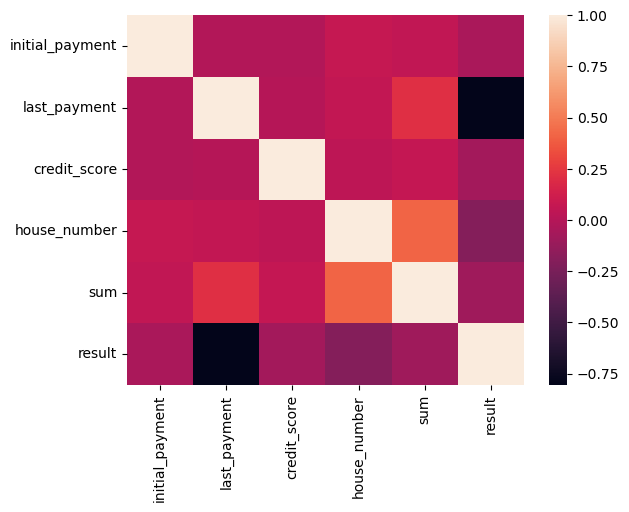

In [27]:
sns.heatmap(df.corr())

In [ ]:
## Step 7 – Initialize the Decision Tree Model

In [28]:
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)

dt_model

DecisionTreeClassifier(random_state=42)

In [ ]:
# Step 8 - Train the Decision Tree model

In [29]:
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 3))
print()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)
print()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()

Accuracy: 0.995

Confusion Matrix: [[106   1]
 [  0  94]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       107
           1       0.99      1.00      0.99        94

    accuracy                           1.00       201
   macro avg       0.99      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201




In [ ]:
## F1 score

In [30]:
# F1 score
from sklearn.metrics import f1_score

print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.9947089947089947


In [ ]:
## Confusion Matrix Heatmap

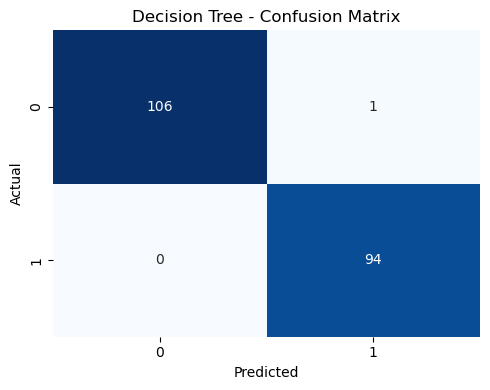

In [31]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
## Decision Tree Plot

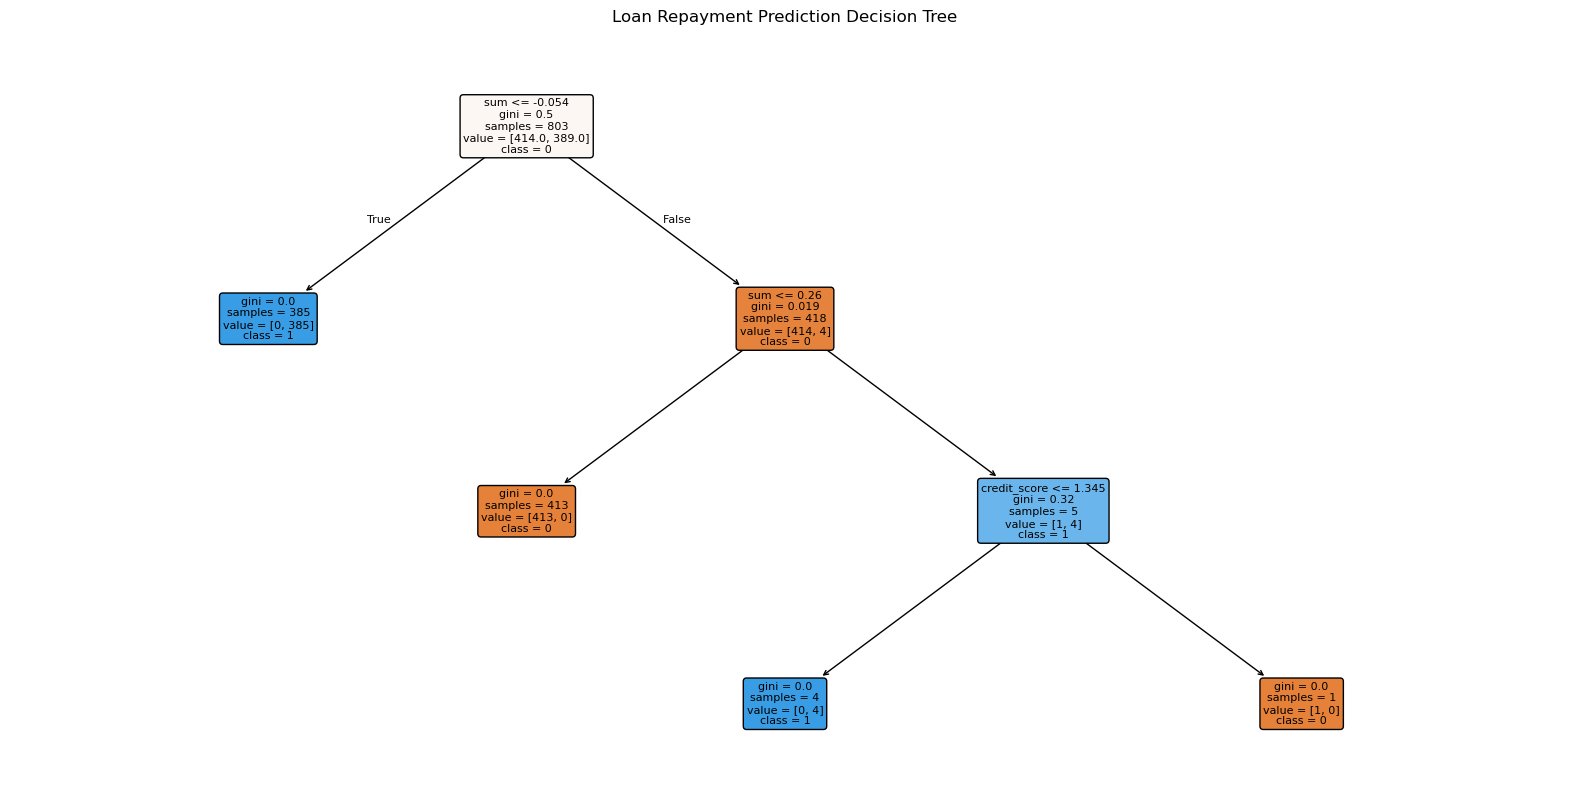

In [32]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Loan Repayment Prediction Decision Tree")
plt.show()

In [ ]:
# Check example

In [39]:
example_input = [[200, 10050, 350, 3050, 13500]]

# Predict loan repayment for a person with:
# initial_payment=200, last_payment=10050, credit_score=350, 
# house_number=3050, sum=13500
example_df = pd.DataFrame(example_input, columns=X.columns)

# Scale it with the same scaler
example_scaled = sc.transform(example_df)

print("Prediction for example input")
print("(0 = no, 1 = yes):")
print(dt_model.predict(example_scaled))

Prediction for example input
(0 = no, 1 = yes):
[1]
